In [141]:
!pip install category_encoders

You should consider upgrading via the 'C:\Users\swhon\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from category_encoders import WOEEncoder
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix 

### Loading the Data

In [143]:
train_df=pd.read_csv('fraudTrain.csv')
test_df=pd.read_csv('fraudTest.csv')

### EDA

In [144]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [145]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [146]:
train_df.shape

(1296675, 23)

In [147]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [148]:
is_fraud=train_df["is_fraud"].value_counts()
print("Yes: ", is_fraud[1])
print("No: ", is_fraud[0])

Yes:  7506
No:  1289169


In [149]:
print(train_df.isna().sum().sum())
print(train_df.duplicated().sum())

0
0


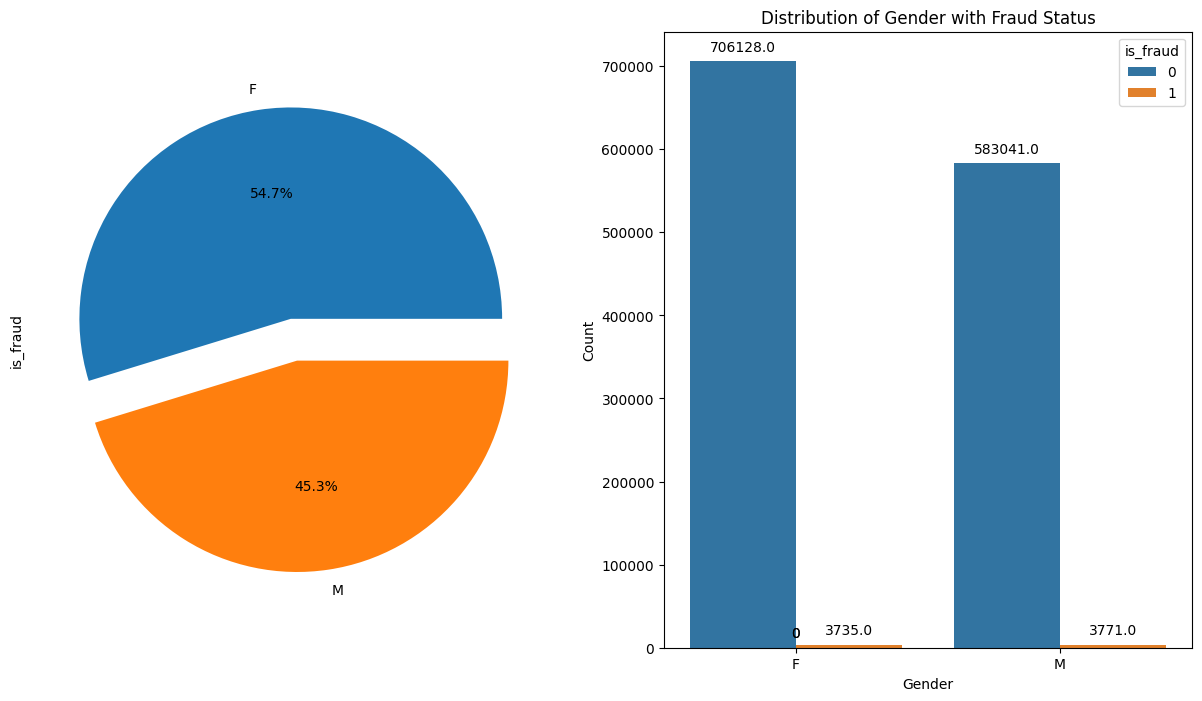

In [150]:
fig,axb = plt.subplots(ncols=2,nrows=1,figsize=(15, 8))

#Gender Distribution
explode = [0.1, 0.1]
train_df.groupby('gender')['is_fraud'].count().plot.pie(explode=explode, autopct="%1.1f%%",ax=axb[0]);

ax = sns.countplot(x="gender", hue="is_fraud", data=train_df,ax=axb[1])

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.title("Distribution of Gender with Fraud Status")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show the plot
plt.show()


Females are making more transactions but males are more likely to make fraud transaction

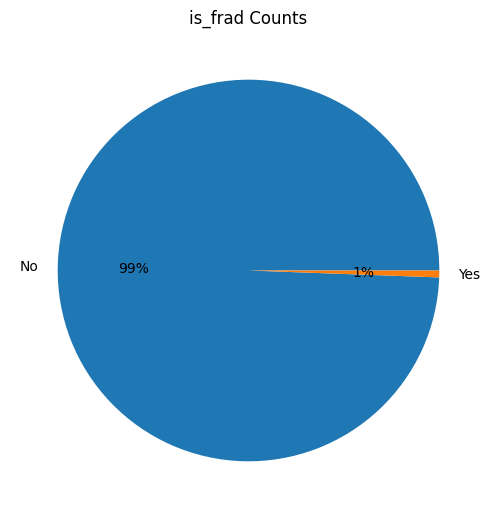

In [151]:
is_fraud=train_df['is_fraud'].value_counts()
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.pie(is_fraud,labels=['No','Yes'],autopct="%0.0f%%")
plt.title("is_frad Counts")
plt.tight_layout()
plt.show()

### Feature Engineering 

In [152]:
# Changing data type from obj to datetime

train_df['trans_date_trans_time']=pd.to_datetime(train_df['trans_date_trans_time'],format='%Y-%m-%d %H:%M:%S')
test_df['trans_date_trans_time']=pd.to_datetime(test_df['trans_date_trans_time'],format='%Y-%m-%d %H:%M:%S')

In [153]:
test_df['trans_date_trans_time'].dtype

dtype('<M8[ns]')

In [154]:
train_df['hour']=train_df['trans_date_trans_time'].dt.hour
test_df['hour']=test_df['trans_date_trans_time'].dt.hour

train_df['month']=train_df['trans_date_trans_time'].dt.month
test_df['month']=test_df['trans_date_trans_time'].dt.month

train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,month
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1


#### Converting dob into age

In [155]:
train_df['dob']=pd.to_datetime(train_df['dob'],format='%Y-%m-%d %H:%M:%S')
test_df['dob']=pd.to_datetime(test_df['dob'],format='%Y-%m-%d %H:%M:%S')

In [156]:
train_df['age']=train_df['trans_date_trans_time'].dt.year - train_df['dob'].dt.year
test_df['age']=test_df['trans_date_trans_time'].dt.year - test_df['dob'].dt.year

train_df

train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,month,age
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1,31
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1,41
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1,57
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1,52
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1,33


In [157]:
train_df['age'].dtype

dtype('int64')

In [158]:
train_df.drop(columns=['dob'],inplace=True)

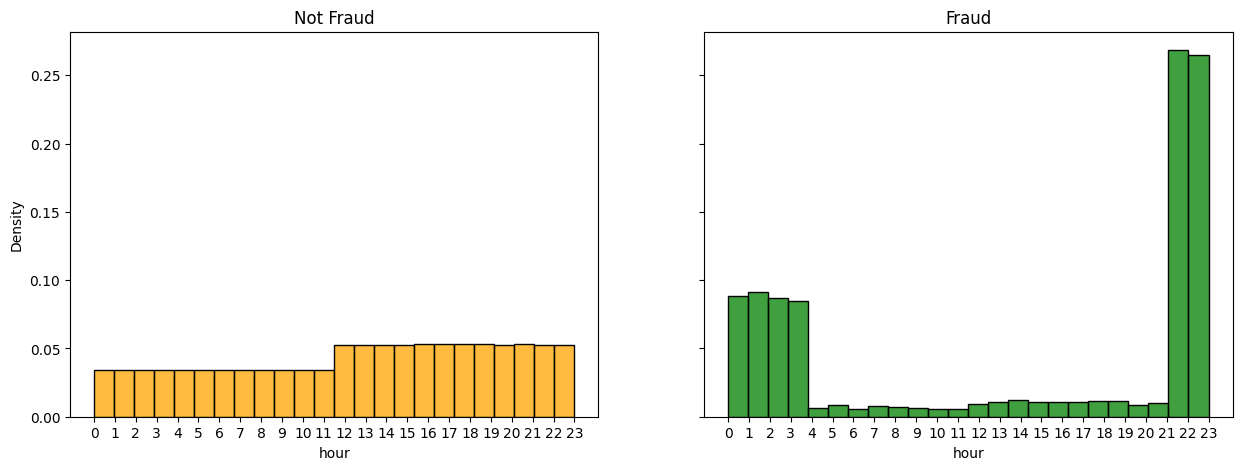

In [159]:
f, (ax1, ax2)=plt.subplots(1,2,figsize=(15,5),sharey=True)

ax1=sns.histplot(x='hour', data=train_df[train_df['is_fraud']==0],
                 stat='density',bins=24,ax=ax1,color='orange')

ax2=sns.histplot(x='hour',data=train_df[train_df['is_fraud']==1],
                 stat='density',bins=24,ax=ax2,color='green')

ax1.set_title("Not Fraud")
ax2.set_title("Fraud")

ax1.set_xticks(np.arange(24))
ax2.set_xticks(np.arange(24));

Fraud transactions occur usually during late at night, especially concentrated during the last two hours of the day. 

### Data Preprocessing

In [160]:
unique_transaction_count=len(train_df['trans_num'].unique())
print("Total count of unique transaction numbers:", unique_transaction_count)

Total count of unique transaction numbers: 1296675


In [161]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,month,age
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1,31
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1,41
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1,57
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1,52
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1,33


In [162]:
columns_to_drop=['first','last','street','zip','unix_time','trans_num','trans_date_trans_time']
train_df=train_df.drop(columns_to_drop,axis=1)
test_df=test_df.drop(columns_to_drop,axis=1)

In [163]:
train_df.head()

,Unnamed: 0,cc_num,merchant,category,amt,gender,city,state,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month,age
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,0,1,31
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,0,1,41
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,0,1,57
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,0,1,52
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,0,1,33


In [164]:
# deleting 'fraud_' infront of every ['merchant'] column
train_df['merchant']=train_df['merchant'].apply(lambda x:x.replace('fraud_',''))

In [165]:
train_df.head()

,Unnamed: 0,cc_num,merchant,category,amt,gender,city,state,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month,age
0,0,2703186189652095,"Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,0,1,31
1,1,630423337322,"Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,0,1,41
2,2,38859492057661,Lind-Buckridge,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,0,1,57
3,3,3534093764340240,"Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,0,1,52
4,4,375534208663984,Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,0,1,33


In [166]:
train_df.describe(include='object')

,merchant,category,gender,city,state,job
count,1296675,1296675,1296675,1296675,1296675,1296675
unique,693,14,2,894,51,494
top,Kilback LLC,gas_transport,F,Birmingham,TX,Film/video editor
freq,4403,131659,709863,5617,94876,9779


### Data Encoding

WOEEncoder (Weight of Evidence)

A type of categorical encoding technique used in ML, particularly in the context of handling categorical variables in predictive modeling tasks, such as classification. It is a popular encoding technique in credit scoring and fraud detection. 

WOE encoding calculates numerical values based on the relationship between each category and the target variable. WOE encoding replaces each categorical value by calculating the ratio of the event occurrence rate and non-event occurrence rate of the target variable (usually binary) for each category.

In [167]:
# applying label encoding
train_df['gender'] = train_df['gender'].map({'F': 0, 'M': 1})

# applying WOE encoding
for col in ['job','merchant', 'category', 'city','state']:
    train_df[col] = WOEEncoder().fit_transform(train_df[col],train_df['is_fraud'])

In [168]:
train_df.head()

,Unnamed: 0,cc_num,merchant,category,amt,gender,city,state,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month,age
0,0,2703186189652095,0.959326,0.924914,4.97,0,-2.469513,-0.156457,36.0788,-81.1781,3495,-1.080186,36.011293,-82.048315,0,0,1,31
1,1,630423337322,0.663187,0.898799,107.23,0,-3.027790,-0.122657,48.8878,-118.2105,149,-0.904144,49.159047,-118.186462,0,0,1,41
2,2,38859492057661,-0.790166,-0.847622,220.11,1,-1.076791,-0.988155,42.1808,-112.2620,4154,1.120434,43.150704,-112.154481,0,0,1,57
3,3,3534093764340240,-0.416817,-0.209382,45.00,1,1.746674,-0.727015,46.2306,-112.1138,1939,0.361872,47.034331,-112.561071,0,0,1,52
4,4,375534208663984,-0.277905,-0.611091,41.96,1,-2.464077,0.162213,38.4207,-79.4629,99,-2.464077,38.674999,-78.632459,0,0,1,33


### Down-sampling and Scaling 

To deal with imbalanced data we will use Resampling Techniques.

Reducing the number of instances in the majority class to balance it with the number of instances in the minority class.
This helps preven the ML models from being biased toward the majority class and improves its ability to learn patterns from the minority class. 

In [169]:
No_class=train_df[train_df["is_fraud"]==0]
Yes_class=train_df[train_df["is_fraud"]==1]

No_class=resample(No_class,replace=False,n_samples=len(Yes_class))
down_samples=pd.concat([Yes_class,No_class],axis=0)

X=down_samples.drop("is_fraud",axis=1)
y=down_samples["is_fraud"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=65)

In [172]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

c:\Users\swhon\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


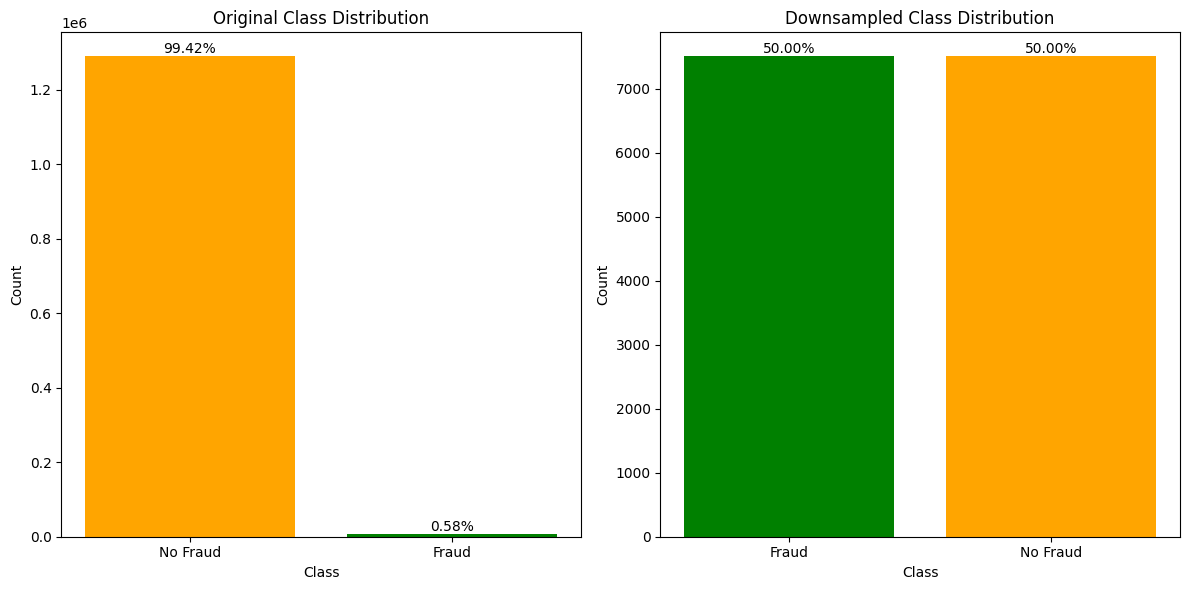

In [173]:
# Counting the occurences of each class in the origincal dataset
original_class_counts=train_df["is_fraud"].value_counts()

# Count the occurences of each class in the downsampled dataset
downsampled_class_counts=down_samples["is_fraud"].value_counts()

# Calculate the percentage of each class
original_percentages=original_class_counts / len(train_df) * 100
downsampled_percentages=downsampled_class_counts / len(down_samples) * 100

# Plotting 
plt.figure(figsize=(12,6))

# Bar chart for original class distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['No Fraud', 'Fraud'])

# Bar chart for downsampled class distribution
plt.subplot(1, 2, 2)
bars_2 = plt.bar(downsampled_class_counts.index, downsampled_class_counts.values, color=['orange', 'green'])
for bar, label in zip(bars_2, downsampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Downsampled Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(downsampled_class_counts.index, ['No Fraud', 'Fraud'])

plt.tight_layout() # the plots will be automatically adjusted to ensure that there is no overlap between subplots and that all elements are clearly visible.
plt.show()

### Machine Learning model training

#### Logistic Regresssion Model

In [175]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
predict_lr=lr.predict(X_test)
print(classification_report(y_test,predict_lr))
lr_accuracy=accuracy_score(predict_lr, y_test)
print('The accuracy of the Logistics Regression model is: {:.2f}%'.format(lr_accuracy*100))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66      1486
           1       0.00      0.00      0.00      1517

    accuracy                           0.49      3003
   macro avg       0.25      0.50      0.33      3003
weighted avg       0.24      0.49      0.33      3003

The accuracy of the Logistics Regression model is: 49.48%


c:\Users\swhon\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\swhon\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\swhon\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif